<a href="https://colab.research.google.com/github/soulayman-al-abdallah/Data-Science-Projects/blob/main/M03_Swine_Flu_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Case Study:** Swine Flu Disease prediction
<br>We will use a Swine Flu dataset that tells us if a person has the flu or not based on the symptoms he/she is experiencing. The columns in this dataset are:<br>
* Chills: has chills or not.
* Runny nose: has a runny nose or not.
* Headache: the level of headache that a person is experiencing ( Miild, Moderate, or No headache).
* Fever: has fever or not.
* Flu: The target value, the person has the flu or not.

#Importing Librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

#Loading the Dataset

In [2]:
# clone git repo
!git clone https://github.com/zaka-ai/machine_learning_certification

# change working directory
%cd machine_learning_certification/

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (43/43), done.
/content/machine_learning_certification


In [3]:
df = pd.read_csv('flu.csv')
df.head()

,Chills,runny nose,head ache,fever,Flu
0,Y,N,Mild,Y,N
1,Y,Y,No,N,Y
2,Y,N,Strong,Y,Y
3,N,Y,Mild,Y,Y
4,N,N,No,N,N


**▶  We can see that:**


we have 4 features that will predict if the person has the Swine Flu or not.



---



Let's check the shape of our data.

In [4]:
#checking the shape of our data
df.shape

(8, 5)

**▶ We can see that:**

8 examples in this dataset (A small one! Will be good enough for our demonstration purposes).



---



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Chills      8 non-null      object
 1   runny nose  8 non-null      object
 2   head ache   8 non-null      object
 3   fever       8 non-null      object
 4   Flu         8 non-null      object
dtypes: object(5)
memory usage: 448.0+ bytes


**▶ We can see that:**

No missing values. However, all our features and target variables are of data type object which we can't feed to the model, so we need to clean those.

#Dataset Preprocessing

## Converting Categorical Features to Numerical

We need to change the categorical features to Numerical, in order to feed them to the algorithm so we are able to run the classification.

In [6]:
#encoding the values using the LabelEncoder tool provided by scikit learn

encoder = preprocessing.LabelEncoder()
df['Chills'] = encoder.fit_transform(df['Chills'])
df['runny nose'] = encoder.fit_transform(df['runny nose'])
df['head ache'] = encoder.fit_transform(df['head ache'])
df['fever'] = encoder.fit_transform(df['fever'])
df['Flu'] = encoder.fit_transform(df['Flu'])

df.head(8)

,Chills,runny nose,head ache,fever,Flu
0,1,0,0,1,0
1,1,1,1,0,1
2,1,0,2,1,1
3,0,1,0,1,1
4,0,0,1,0,0
5,0,1,2,1,1
6,0,1,2,0,0
7,1,1,0,1,1




---



#Naive Bayes

Now we will implement a Naive Bayes Model from scratch to classify if a person has the flu or not given that he/she is experiencing some symptoms.

In our case, we have:
* **F1:** Chills
* **F2:** runny nose
* **F3:** headache
* **F4:** Fever
* **Class:** Flu or No Flu
 <br> 

So, given a set of features, what we do is calculate P1 and P2, which are P(Flu) and P(No Flu), respectively.  Finally, the larger between them is chosen to be the predicted class for the given data sample.<br> <br>
<img src="https://equatio-api.texthelp.com/svg/P_1%3DP%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_1%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DYES%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_2%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DYES%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_3%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DYES%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_4%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DYES%7D%5Cright)%5Ccdot%20P(%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DYES%7D)%5C%20%5Cpropto%20P%5Cleft(%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DYES%7D%5Cmid%5Ctextcolor%7B%23E94D40%7D%7BF_1%2CF_2%2CF_3%2CF_4%7D%5Cright)" alt="P sub 1 equals P of open paren F sub 1 divides F of l u equals Y E S close paren times P of open paren F sub 2 divides F of l u equals Y E S close paren times P of open paren F sub 3 divides F of l u equals Y E S close paren times P of open paren F sub 4 divides F of l u equals Y E S close paren times P of open paren F of l u equals Y E S close paren proportional to P of open paren F of l u equals Y E S divides F sub 1 comma F sub 2 comma F sub 3 comma F sub 4 close paren">
<br>
<img src="https://equatio-api.texthelp.com/svg/P_2%3DP%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_1%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DNO%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_2%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DNO%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_3%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DNO%7D%5Cright)%5Ccdot%20P%5Cleft(%5Ctextcolor%7B%23E94D40%7D%7BF_4%7D%5Cmid%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DNO%7D%5Cright)%5Ccdot%20P(%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DNO%7D)%5C%20%5Cpropto%20P%5Cleft(%5Ctextcolor%7B%232B7FBB%7D%7BFlu%3DNO%7D%5Cmid%5Ctextcolor%7B%23E94D40%7D%7BF_1%2CF_2%2CF_3%2CF_4%7D%5Cright)" alt="P sub 2 equals P of open paren F sub 1 divides F of l u equals N O close paren times P of open paren F sub 2 divides F of l u equals N O close paren times P of open paren F sub 3 divides F of l u equals N O close paren times P of open paren F sub 4 divides F of l u equals N O close paren times P of open paren F of l u equals N O close paren proportional to P of open paren F of l u equals N O divides F sub 1 comma F sub 2 comma F sub 3 comma F sub 4 close paren">
<br>


* If P1>P2 --> The Person has the flu
* If P1<P2 --> The person does not have the flu

## Naive Bayes from Scracth



In [7]:
def naive_bayes (data, features, target_name):
  #We assume the user will give a numpy array of fetaures
  n_examples = len(data)
  n_features = features.shape[0]

  #Seperating the dataset samples depending on the target value
  target_yes = data [data[target_name] == 1] # samples for YES
  target_no = data[data[target_name] == 0] # samples for NO

  #Computing independent probabilities of class YES and No
  p_target_yes = len(target_yes)/float(n_examples) # P(Flu=YES)
  p_target_no = len(target_no)/float(n_examples) # P(Flu=NO)

  #For each feature F, we need to compute the conditional probabilities: P(Features | flu=YES) and P(Features | flu=NO)
  #We create two lists that will hold the probabilities of each feature conditioned upon the class (P(F1 | flu), P(F2 | flu),..)

  p_feature_given_target_yes = []
  p_feature_given_target_no = []

  for i in range (features.shape[0]): #Loop through all 4 features

    #Calculate P(F/Target=yes)
    p_f_given_t_y = len(target_yes[target_yes.iloc[:,i] == features[i]])/float(len(target_yes))
    p_feature_given_target_yes.append(p_f_given_t_y) #Append probabilities of all features conditioned on class Flu=YES

    #Calculate P(F/Target=no)
    p_f_given_t_n = len(target_no[target_no.iloc[:,i] == features[i]])/float(len(target_no))
    p_feature_given_target_no.append(p_f_given_t_n) #Append probabilities of all features conditioned on class Flu=NO

  #Finally, we need to apply Bayes' rule formula
  #Note that np.prod multiplies all the elements of a list
  
  p1 = np.prod(p_feature_given_target_yes)*p_target_yes
  p2 = np.prod(p_feature_given_target_no)*p_target_no

  return [p1>p2] #Will return a Boolean on whether the condition is satisfied or not

### Make a Prediction

We will consider the following features for our person.
* **Chills:** Yes (1)
* **runny nose:** Yes (1)
* **headache:** Mild (1)
* **Fever:** Yes (1)

In [8]:
features = np.array([1, 1, 1, 1])
target_name = 'Flu'
result = naive_bayes(df, features, target_name)

print(result)

[True]


**▶  We can say that:**

Given that p1 is greater than p2, then we can predict the person HAS the flu. 



---



## Naive Bayes in Scikit learn

In [9]:
from sklearn.naive_bayes import CategoricalNB

X = df.drop('Flu', axis=1)
Y = df['Flu']

clf = CategoricalNB()
clf.fit(X, Y)

result = clf.predict([[1,1,1,1]])
print(result)

#We can predict the probability of the class here.
print(clf.predict_proba([[1,1,1,1]]))

[1]
[[0.14938211 0.85061789]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  "X does not have valid feature names, but"


**▶  We can say that:**

class 1 has a higher probability, which means the person HAS the flu - which is a similar result from what we got with our NB algorithm built from scratch!



---

#Decision Trees

Now, we will try to solve the same problem but using decision trees.

In [10]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Flu', axis=1)
Y = df['Flu']

decision_tree_classifier = DecisionTreeClassifier(max_leaf_nodes= 10)
decision_tree_classifier.fit(X,Y)

DecisionTreeClassifier(max_leaf_nodes=10)

##Printing Text Structure of the tree

In [11]:
from sklearn import tree

text_representation = tree.export_text(decision_tree_classifier, feature_names=['Chills', 'Runny Nose', 'Headache', 'Fever'])
print(text_representation)

|--- Fever <= 0.50
|   |--- Chills <= 0.50
|   |   |--- class: 0
|   |--- Chills >  0.50
|   |   |--- class: 1
|--- Fever >  0.50
|   |--- Runny Nose <= 0.50
|   |   |--- Headache <= 1.00
|   |   |   |--- class: 0
|   |   |--- Headache >  1.00
|   |   |   |--- class: 1
|   |--- Runny Nose >  0.50
|   |   |--- class: 1



##Plotting the tree to see its structure

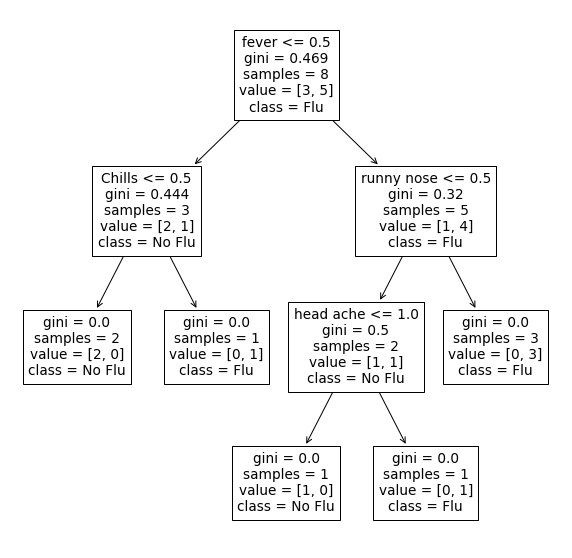

In [12]:
from sklearn import tree

fig = plt.figure(figsize=(10,10))
tree.plot_tree(decision_tree_classifier, feature_names=X.columns, class_names=['No Flu', 'Flu'])
plt.show()

##Predicting using a Decision Tree

In [15]:
features = np.array([1,1,1,1])

result = decision_tree_classifier.predict([features])
print("This person has the flue:", result)

This person has the flue: [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


Once again, we get the same result from our DT as our NB algorithm.